In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import ast
from sklearn.utils import shuffle

In [28]:
#Loading the datasets to build the autoencoder

training_data=pd.read_csv('sample-1.csv')
#matrix = np.array(training_data)
training_data.shape
training_data

,coordinates,Young's modulus
0,"[0.0, 0.0]",2
1,"[0.0, 0.12]",2
2,"[0.0, 0.24]",2
3,"[0.0, 0.36]",2
4,"[0.0, 0.48]",2
...,...,...
284,"[1.92, 1.44]",2
285,"[1.92, 1.56]",2
286,"[1.92, 1.68]",2
287,"[1.92, 1.7999999999999998]",2


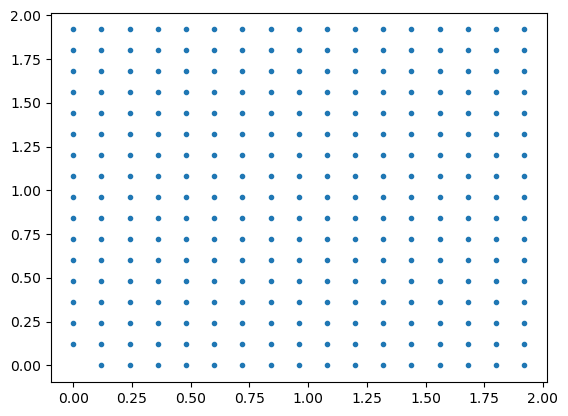

In [29]:
#Extract the x and y coordinates from the "coordinates" column, ignoring the first row
coordinates = np.array(training_data['coordinates'].iloc[1:])
x_coords = np.array([ast.literal_eval(coord)[0] for coord in coordinates])
y_coords = np.array([ast.literal_eval(coord)[1] for coord in coordinates])

plt.plot(x_coords, y_coords, '.')

In [4]:
#x_coords
x_coords.shape

(288,)

In [5]:
#normalize the data to increase the encoders accuracy
x_coords = x_coords/2
y_coords = y_coords/2
#x_coords

In [6]:
# Extract the Young's modulus values, ignoring the first row
youngs_modulus = np.array(training_data["Young's modulus"].iloc[1:])

In [7]:
#youngs_modulus

In [8]:
youngs_modulus = youngs_modulus/2
youngs_modulus.shape
#youngs_modulus

(288,)

In [9]:
#Split the data into training and testing sets
#Shuffle the data data before splitting to ensure that the training and testing sets
#have a representative distribution of samples

x_coords, y_coords, youngs_modulus = shuffle(x_coords, y_coords, youngs_modulus, random_state=42)

x_split_index = int(0.5 * len(x_coords))
y_split_index = int(0.5 * len(y_coords))
x_train = x_coords[:x_split_index]
y_train = y_coords[:y_split_index]
z_train = youngs_modulus[:x_split_index]

x_test = x_coords[x_split_index:]
y_test = y_coords[y_split_index:]
z_test = youngs_modulus[x_split_index:]
len(x_train)

144

In [30]:
# Concatenate the input data into a single tensor
train_data = np.concatenate([x_train.reshape(-1, 144, 1), y_train.reshape(-1, 144, 1), z_train.reshape(-1, 144, 1)], axis=-1)
test_data = np.concatenate([x_test.reshape(-1, 144, 1), y_test.reshape(-1, 144, 1), z_test.reshape(-1, 144, 1)], axis=-1)
#train_data = np.concatenate([x_train, y_train, z_train], axis=-1)
#test_data = np.concatenate([x_test, y_test, z_test], axis=-1)
print(train_data.shape)
print(test_data.shape)
train_data

(1, 144, 3)
(1, 144, 3)


array([[[0.12, 0.72, 1.  ],
        [0.54, 0.3 , 1.  ],
        [0.9 , 0.12, 1.  ],
        [0.12, 0.54, 1.  ],
        [0.6 , 0.72, 1.  ],
        [0.  , 0.6 , 1.  ],
        [0.12, 0.78, 1.  ],
        [0.6 , 0.18, 1.  ],
        [0.24, 0.6 , 1.  ],
        [0.66, 0.54, 1.  ],
        [0.78, 0.12, 1.  ],
        [0.12, 0.  , 1.  ],
        [0.36, 0.9 , 1.  ],
        [0.96, 0.48, 1.  ],
        [0.18, 0.36, 1.  ],
        [0.72, 0.78, 1.  ],
        [0.  , 0.36, 1.  ],
        [0.78, 0.24, 1.  ],
        [0.84, 0.  , 1.  ],
        [0.24, 0.48, 1.  ],
        [0.9 , 0.78, 1.  ],
        [0.3 , 0.  , 1.  ],
        [0.36, 0.72, 1.  ],
        [0.96, 0.9 , 1.  ],
        [0.24, 0.36, 1.  ],
        [0.84, 0.78, 1.  ],
        [0.48, 0.3 , 1.  ],
        [0.48, 0.72, 1.  ],
        [0.36, 0.6 , 1.  ],
        [0.18, 0.6 , 1.  ],
        [0.36, 0.  , 1.  ],
        [0.6 , 0.96, 1.  ],
        [0.54, 0.12, 1.  ],
        [0.78, 0.96, 1.  ],
        [0.6 , 0.84, 1.  ],
        [0.54, 0.96,

In [11]:
# Define the shape of the input data
input_shape = (144, 3)

# Define the encoder network
encoder_input = keras.Input(shape=input_shape, name='encoder_input')
x = keras.layers.Flatten()(encoder_input)
x = keras.layers.Dense(72, activation='relu')(x)
encoder_output = keras.layers.Dense(36, activation='relu')(x)

encoder= keras.Model(encoder_input, encoder_output, name= "encoder")

# Define the decoder network
decoder_input = keras.layers.Dense(72, activation='relu')(encoder_output)
x = keras.layers.Dense(144*3, activation='sigmoid')(decoder_input)
x = keras.layers.Reshape((144, 3))(x)
decoder_output = keras.layers.Reshape((144, 3))(x)

# Define the autoencoder model
autoencoder = keras.Model(inputs=encoder_input, outputs=decoder_output, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 144, 3)]          0         
                                                                 
 flatten (Flatten)           (None, 432)               0         
                                                                 
 dense (Dense)               (None, 72)                31176     
                                                                 
 dense_1 (Dense)             (None, 36)                2628      
                                                                 
 dense_2 (Dense)             (None, 72)                2664      
                                                                 
 dense_3 (Dense)             (None, 432)               31536     
                                                                 
 reshape (Reshape)           (None, 144, 3)            

2023-03-05 15:55:34.563842: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')

In [24]:
# Train the autoencoder
history = autoencoder.fit(x=train_data, y=train_data,
                          epochs=100, batch_size=32, shuffle=True, validation_data=(test_data, test_data))

Epoch 1/100
1/1 [==============================] - 0s 325ms/step - loss: 0.0035 - val_loss: 0.2329
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0223 - val_loss: 0.2334
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0204 - val_loss: 0.2344
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 0.0124 - val_loss: 0.2353
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0078 - val_loss: 0.2340
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0104 - val_loss: 0.2331
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0114 - val_loss: 0.2323
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0102 - val_loss: 0.2319
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0093 - val_loss: 0.2324
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0074 - val_loss: 0.2334
Epoch 11/100
1/1 [

Epoch 84/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0023 - val_loss: 0.2321
Epoch 85/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0023 - val_loss: 0.2322
Epoch 86/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0023 - val_loss: 0.2321
Epoch 87/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0023 - val_loss: 0.2319
Epoch 88/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0022 - val_loss: 0.2317
Epoch 89/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0021 - val_loss: 0.2317
Epoch 90/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0022 - val_loss: 0.2315
Epoch 91/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0024 - val_loss: 0.2317
Epoch 92/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0024 - val_loss: 0.2319
Epoch 93/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0024 - val_loss: 0.2319
Epoch 94/1

In [14]:
#Printing the original test data to comapare with the predicted data set later
print(test_data)

[[[0.66 0.42 1.  ]
  [0.   0.78 1.  ]
  [0.12 0.12 1.  ]
  [0.06 0.72 1.  ]
  [0.48 0.42 0.5 ]
  [0.78 0.54 1.  ]
  [0.54 0.   1.  ]
  [0.18 0.06 1.  ]
  [0.3  0.66 1.  ]
  [0.96 0.72 1.  ]
  [0.66 0.84 1.  ]
  [0.12 0.48 1.  ]
  [0.84 0.54 1.  ]
  [0.66 0.66 1.  ]
  [0.48 0.06 1.  ]
  [0.06 0.6  1.  ]
  [0.96 0.6  1.  ]
  [0.48 0.36 1.  ]
  [0.6  0.66 1.  ]
  [0.   0.06 1.  ]
  [0.9  0.24 1.  ]
  [0.3  0.96 1.  ]
  [0.9  0.84 1.  ]
  [0.78 0.6  1.  ]
  [0.3  0.84 1.  ]
  [0.12 0.18 1.  ]
  [0.18 0.66 1.  ]
  [0.48 0.9  1.  ]
  [0.72 0.54 1.  ]
  [0.6  0.78 1.  ]
  [0.72 0.96 1.  ]
  [0.   0.72 1.  ]
  [0.96 0.78 1.  ]
  [0.96 0.12 1.  ]
  [0.06 0.66 1.  ]
  [0.72 0.42 1.  ]
  [0.   0.3  1.  ]
  [0.42 0.24 1.  ]
  [0.06 0.96 1.  ]
  [0.6  0.9  1.  ]
  [0.54 0.6  0.5 ]
  [0.72 0.3  1.  ]
  [0.78 0.78 1.  ]
  [0.48 0.18 1.  ]
  [0.18 0.72 1.  ]
  [0.48 0.   1.  ]
  [0.42 0.6  1.  ]
  [0.96 0.42 1.  ]
  [0.84 0.6  1.  ]
  [0.24 0.18 1.  ]
  [0.84 0.84 1.  ]
  [0.18 0.84 1.  ]
  [0.12 0.66

In [25]:
#Running the encoder just to observe the encoded or reduced data set
reduced_data=encoder.predict(test_data)
print("Reduced data has shape of:", reduced_data.shape)
print(reduced_data)

1/1 [==============================] - 0s 14ms/step
Reduced data has shape of: (1, 36)
[[0.        0.        7.3011074 0.        0.        0.        0.
  0.        0.        2.2031088 0.        0.        0.        3.4422832
  3.6486335 0.        3.292997  0.        2.5648177 2.5466216 4.595363
  0.        0.        0.634042  0.        6.070576  4.923232  0.
  0.        6.6170106 4.3905063 1.1148068 4.47405   0.        0.
  0.       ]]


In [26]:
# Use the trained autoencoder to predict on the test data
predicted_data = autoencoder.predict(test_data)

# Print the shape of the predicted data
print(predicted_data.shape)
print(predicted_data)


1/1 [==============================] - 0s 54ms/step
(1, 144, 3)
[[[1.2632976e-01 7.0494193e-01 9.9972159e-01]
  [5.1555616e-01 3.1812257e-01 9.9969703e-01]
  [8.9237875e-01 1.2685829e-01 9.9965459e-01]
  [1.3000999e-01 5.3570491e-01 9.9963516e-01]
  [6.1612898e-01 7.1107936e-01 9.9965000e-01]
  [2.8536012e-04 5.9265482e-01 9.9979919e-01]
  [1.3356584e-01 7.7240986e-01 9.9988663e-01]
  [5.9428495e-01 1.8586196e-01 9.9980903e-01]
  [2.5493014e-01 6.0042423e-01 9.9973184e-01]
  [6.6704273e-01 4.9957374e-01 9.9974591e-01]
  [7.7923065e-01 1.2749876e-01 9.9952036e-01]
  [1.2423470e-01 1.7073403e-04 9.9960822e-01]
  [3.7948638e-01 8.9857858e-01 9.9982995e-01]
  [9.5243299e-01 4.6060666e-01 9.9973947e-01]
  [1.9070148e-01 3.5925201e-01 9.9985617e-01]
  [7.0438081e-01 7.5571561e-01 9.9975473e-01]
  [3.0838509e-04 3.7579188e-01 9.9974740e-01]
  [7.6817280e-01 2.4226606e-01 9.9961847e-01]
  [8.3376223e-01 2.6216358e-04 9.9995029e-01]
  [2.3827919e-01 4.6283346e-01 9.9953049e-01]
  [8.9751595e-01

In [27]:
# Calculate the difference between predicted_data and test_data
diff = predicted_data - test_data

# Calculate the mean absolute error
mae = np.mean(np.abs(diff))

# Calculate the percentage error
pct_error = np.mean(np.abs(diff) / test_data) * 100

print("Mean absolute error:", mae)
print("Percentage error:", pct_error, "%")

Mean absolute error: 0.23159734784068742
Percentage error: inf %


/var/folders/rg/szb78kyd2cnd60qwd0m1rzvc0000gn/T/ipykernel_73900/883995133.py:8: RuntimeWarning: divide by zero encountered in true_divide
  pct_error = np.mean(np.abs(diff) / test_data) * 100


In [17]:
# Calculate the mean squared error between the predicted and original test data
#mse = ((predicted_data - test_data)**2).mean(axis=None)
#print(mse)
# Calculate the percentage error between the predicted and original test data
#percent_error = abs(predicted_data - test_data)/test_data*100
#print(percent_error)

# Plot the mean squared error and percentage error
#fig, axs = plt.subplots(1, 2, figsize=(10,5))
#axs[0].imshow(mse)
#axs[0].set_title('Mean Squared Error')
#axs[1].imshow(percent_error)
#axs[1].set_title('Percentage Error')
#plt.show()



0.12103636795925304
[[[9.02683903e+01 7.91593858e+01 1.68717504e+00]
  [           inf 5.96676078e+01 1.86506510e+00]
  [7.13552290e+02 2.97050449e+01 2.39439011e+00]
  [6.53067271e+01 2.60046995e+01 2.57743597e+00]
  [2.51735414e+01 4.68452811e+01 9.56853747e+01]
  [9.80575705e+01 1.51199363e+01 1.19376183e+00]
  [9.50531753e+01            inf 4.45562601e-01]
  [2.26899158e+02 3.07275061e+02 8.42291117e-01]
  [3.37152441e+01 1.05551207e+01 1.84536576e+00]
  [3.29431665e+01 2.84658581e+01 1.32718682e+00]
  [1.05922912e+01 9.40432573e+01 3.84953022e+00]
  [3.94538191e+01 9.83692598e+01 2.93358564e+00]
  [5.43489551e+01 8.27072987e+01 8.24433565e-01]
  [4.45928306e+01 2.85449359e+01 1.72855854e+00]
  [6.36703512e+01 4.22256841e+02 6.57773018e-01]
  [9.51353912e+02 1.92876697e+01 1.20344162e+00]
  [9.74057144e+01 3.45041265e+01 1.35239363e+00]
  [5.12830580e+01 3.39263224e+01 3.34298015e+00]
  [4.91464178e+01 9.73510841e+01 1.37364864e-01]
  [           inf 6.97982415e+02 2.99007297e+00]


/var/folders/rg/szb78kyd2cnd60qwd0m1rzvc0000gn/T/ipykernel_73900/870936982.py:5: RuntimeWarning: divide by zero encountered in true_divide
  percent_error = abs(predicted_data - test_data)/test_data*100
